### Análise exploratória do mercado de trabalho para programadores nos EUA

In [ ]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Dados-Pesquisa.csv", sep = ',', low_memory = False)
df

In [ ]:
#Geração de histogramas por idade
df.Age.hist(bins = 60)
plt.xlabel("Idade")
plt.ylabel("Número de profissionais")
plt.title("Distribuição de Idade")
plt.show()


In [ ]:
#Geração de histogramas por gênero
labels = df.Gender.value_counts().index #Separa as informações por gênero
num = len(df.EmploymentField.value_counts().index)

listaHSV = [(x * 1.0/num, 0.5, 1.0) for x in range(num)] #Cria cores diferentes para cada gênero
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

#Criação do gráfico de pizza
fatias, texto = plt.pie(df.Gender.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05 , 1))
plt.title("Gênero")
plt.show

In [ ]:
#Distribuição de interesses
num = len(df.JobRoleInterest.value_counts().index)
listaHSV = [(x * 1.0/num, 0.5, 1.0) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

labels = df.JobRoleInterest.value_counts().index
colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

fatias, texto = plt.pie(df.JobRoleInterest.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.25, 1))
plt.title("Interesse Profissional")
plt.show()


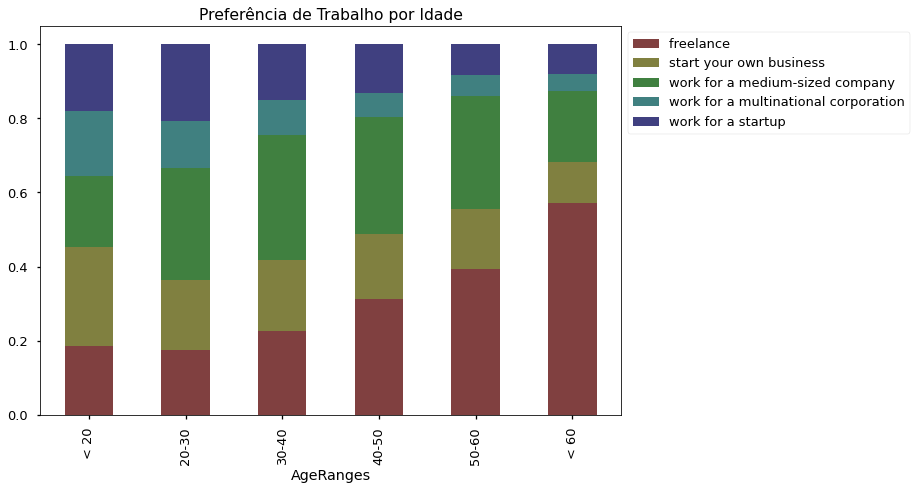

In [36]:
#Preferencia de trabalho por idade
df_ageRanges = df.copy()
bins=[0, 20, 30, 40, 50, 60, 100] #Seciona as idades e coloca-as em "ranges"
df_ageRanges['AgeRanges'] = pd.cut(df_ageRanges['Age'], bins, labels = ["< 20", "20 - 30", "30 - 40", "40 - 50", "50 - 60", "< 60"]) 

df2 = pd.crosstab(df_ageranges.AgeRanges, df_ageranges.JobPref).apply(lambda r: r/r.sum(), axis=1)

num = len(df_ageranges.AgeRanges.value_counts().index)

listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de barras empilhadas
ax1 = df2.plot(kind = "bar", stacked = True, color = listaRGB, title = "Preferência de Trabalho por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))

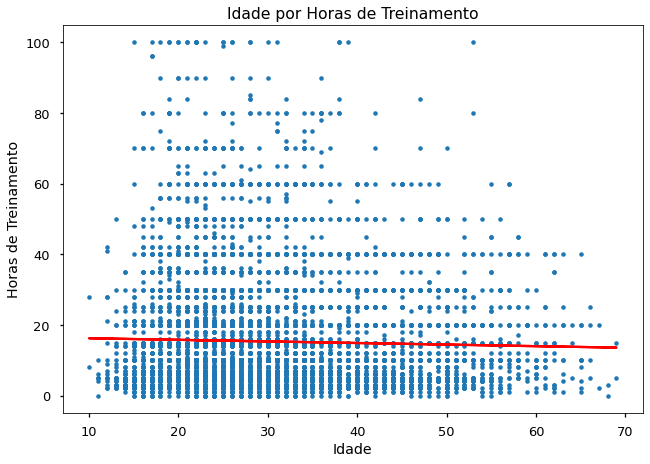

In [37]:
#Relação de idade por horas de aprendizagem
import warnings
warnings.filterwarnings('ignore')

df9 = df.copy()
df9 = df9.dropna(subset=["HoursLearning"])
df9 = df9[df['Age'].isin(range(0,70))]

x = df9.Age
y = df9.HoursLearning

#Criação do mapa de dispersão
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Horas de Treinamento")
plt.title("Idade por Horas de Treinamento")
plt.show()